In [1]:
# Standard Library Imports
from datetime import datetime as dt

# Third-party Imports
import pandas as pd
import numpy as np  # Only keep if used
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder

# Configure Pandas to suppress SettingWithCopyWarning (Use with caution)
pd.options.mode.chained_assignment = None  # Suppresses warnings about chained assignments

# The above imports support:
# - Data manipulation (Pandas, NumPy)
# - Data visualization (Seaborn, Matplotlib, Plotly)
# - Data preprocessing (LabelEncoder from Scikit-learn)





In [2]:
# Load the data with error handling
try:
    casino = pd.read_csv("Online_casino_DIB.csv", encoding="utf-8")  # Adjust encoding if necessary
    print("Dataset loaded successfully.")
    display(casino.head())  # Use display() for better output in Jupyter Notebook
except FileNotFoundError:
    print("Error: The file 'Online_casino_DIB.csv' was not found.")
except pd.errors.EmptyDataError:
    print("Error: The file is empty.")
except pd.errors.ParserError:
    print("Error: Issue parsing the file. Check for formatting errors.")

Dataset loaded successfully.


,ReqTimeUTC,TransactionType,TransactionAmount,Status,AccountIdentifier
0,2019-07-05T05:02:28+0000,LOYALTYCARDDEBIT,10.0,APPROVED,customer1734
1,2019-07-05T05:26:00+0000,LOYALTYCARDDEBIT,10.0,APPROVED,customer1734
2,2019-07-05T04:54:35+0000,LOYALTYCARDCREDITCL,10.0,APPROVED,customer1734
3,2019-07-05T05:02:27+0000,LOYALTYCARDCREDITCL,10.0,APPROVED,customer1734
4,2019-07-05T05:25:59+0000,LOYALTYCARDCREDITCL,10.0,APPROVED,customer1734


In [3]:
# Check data types of each column
casino.dtypes

ReqTimeUTC            object
TransactionType       object
TransactionAmount    float64
Status                object
AccountIdentifier     object
dtype: object

In [4]:
# Convert 'ReqTimeUTC' to datetime format safely
try:
    casino["ReqTimeUTC"] = pd.to_datetime(casino["ReqTimeUTC"], errors="coerce", utc=True)
    print("Column 'ReqTimeUTC' successfully converted to datetime format.")
except KeyError:
    print("Error: Column 'ReqTimeUTC' not found in the dataset.")
except Exception as e:
    print(f"Unexpected error: {e}")

# Display updated data types
print("\nUpdated Data Types:\n")
print(casino.dtypes)


Column 'ReqTimeUTC' successfully converted to datetime format.

Updated Data Types:

ReqTimeUTC           datetime64[ns, UTC]
TransactionType                   object
TransactionAmount                float64
Status                            object
AccountIdentifier                 object
dtype: object


In [5]:
# Get summary statistics for numerical columns
print("\nNumerical Data Summary:\n")
print(casino.describe())

# Get summary statistics for categorical columns (object types)
print("\nCategorical Data Summary:\n")
print(casino.describe(include=["object"]))  # Includes non-numeric columns


Numerical Data Summary:

       TransactionAmount
count      138928.000000
mean          103.012203
std           309.778934
min             1.000000
25%            20.000000
50%            35.000000
75%           100.000000
max         15202.000000

Categorical Data Summary:

         TransactionType    Status AccountIdentifier
count             138928    138928            138928
unique                 3         2              2361
top     LOYALTYCARDDEBIT  APPROVED        customer10
freq               70329    133520              2318


In [6]:
# Get summary statistics while excluding float64 columns
print("\nSummary Statistics (Excluding Float64 Columns):\n")
print(casino.describe(exclude="float64"))


Summary Statistics (Excluding Float64 Columns):

                                 ReqTimeUTC   TransactionType    Status  \
count                                138928            138928    138928   
unique                                  NaN                 3         2   
top                                     NaN  LOYALTYCARDDEBIT  APPROVED   
freq                                    NaN             70329    133520   
mean    2019-08-23 14:37:01.511898112+00:00               NaN       NaN   
min               2019-03-01 08:03:23+00:00               NaN       NaN   
25%     2019-05-19 06:27:26.249999872+00:00               NaN       NaN   
50%        2019-08-21 13:32:02.500000+00:00               NaN       NaN   
75%        2019-11-23 20:28:33.500000+00:00               NaN       NaN   
max               2020-03-02 07:47:06+00:00               NaN       NaN   

       AccountIdentifier  
count             138928  
unique              2361  
top           customer10  
freq            

In [7]:
# Filter the dataset to include only rows where the 'ReqTimeUTC' timestamp is later than February 29, 2020 at midnight (UTC).
# This is useful for isolating data that occurred after a specific cutoff date for further analysis.
casino.ReqTimeUTC > '2020-02-29 00:00:00+00:00'

0         False
1         False
2         False
3         False
4         False
          ...  
138923     True
138924    False
138925    False
138926    False
138927    False
Name: ReqTimeUTC, Length: 138928, dtype: bool

In [8]:
casino = casino[casino.ReqTimeUTC < '2020-02-29 00:00:00+00:00'].copy()


In [9]:
# Filter the dataset to include only rows where the 'ReqTimeUTC' timestamp is earlier than February 29, 2020 at midnight (UTC).
# The '.copy()' is used to create a new DataFrame to avoid setting values on a slice of the original DataFrame, ensuring safe modification.
# This is useful for isolating data that occurred before a specific cutoff date for analysis.

casino.TransactionType.unique()

array(['LOYALTYCARDDEBIT', 'LOYALTYCARDCREDITCL', 'LOYALTYCARDCREDIT'],
      dtype=object)

In [10]:
# Map values in the 'TransactionType' column to new, shorter categories for easier analysis:
# - 'LOYALTYCARDDEBIT' is mapped to 'L2D'
# - 'LOYALTYCARDCREDITCL' is mapped to 'L1D'
# - 'LOYALTYCARDCREDIT' is mapped to 'L2W'
# This helps standardize the transaction types, making the data more concise and readable for analysis.

casino.TransactionType =casino.TransactionType.map({'LOYALTYCARDDEBIT':'L2D', 'LOYALTYCARDCREDITCL':'L1D', 'LOYALTYCARDCREDIT':'L2W'})

In [11]:
# Generate summary statistics for all columns except those of type 'float64'.
# This excludes numeric columns and focuses on providing descriptive statistics for categorical or other non-numeric data types.
# Useful when you want to analyze categorical columns and their distribution, like counts, unique values, top values, and frequencies.

casino.describe(exclude = 'float64' )

,ReqTimeUTC,TransactionType,Status,AccountIdentifier
count,137857,137857,137857,137857
unique,NaN,3,2,2351
top,NaN,L2D,APPROVED,customer10
freq,NaN,69795,132473,2294
mean,2019-08-22 03:05:44.556649216+00:00,NaN,NaN,NaN
min,2019-03-01 08:03:23+00:00,NaN,NaN,NaN
25%,2019-05-18 13:13:36+00:00,NaN,NaN,NaN
50%,2019-08-20 03:04:39+00:00,NaN,NaN,NaN
75%,2019-11-21 13:40:41+00:00,NaN,NaN,NaN
max,2020-02-28 23:54:14+00:00,NaN,NaN,NaN


In [12]:
# Group the dataset by the 'AccountIdentifier' column and count the number of non-null values for each column within each group.
# This provides insight into the distribution of data across different account identifiers, showing how many records exist for each account.
# Useful for identifying how many entries (transactions, events, etc.) are associated with each account.

casino.groupby("AccountIdentifier").count()


,ReqTimeUTC,TransactionType,TransactionAmount,Status
AccountIdentifier,,,,
customer1,884,884,884,884
customer10,2294,2294,2294,2294
customer100,112,112,112,112
customer1000,4,4,4,4
customer1001,46,46,46,46
...,...,...,...,...
customer995,18,18,18,18
customer996,6,6,6,6
customer997,2,2,2,2


In [13]:
# Group the dataset by both 'AccountIdentifier' and 'TransactionType', then count the non-null values for each column within each group.
# This helps to understand the distribution of different transaction types per account and how many records exist for each combination.
# Useful for analyzing the frequency and activity of various transaction types across different accounts.

casino.groupby(["AccountIdentifier","TransactionType"]).count()


ReqTimeUTC  TransactionAmount  Status
AccountIdentifier TransactionType                                       
customer1         L1D                     438                438     438
                  L2D                     444                444     444
                  L2W                       2                  2       2
customer10        L1D                    1164               1164    1164
                  L2D                    1130               1130    1130
...                                       ...                ...     ...
customer997       L2D                       1                  1       1
customer998       L1D                       2                  2       2
                  L2D                       2                  2       2
customer999       L1D                       2                  2       2
                  L2D                       2                  2       2

[4989 rows x 3 columns]

In [14]:
# Group the dataset by both 'AccountIdentifier' and 'TransactionType', then count the non-null values for each column within each group.
# After counting, use 'reset_index()' to flatten the resulting hierarchical index and convert it back into a regular DataFrame.
# This is useful for viewing the count of records per account and transaction type as a flat, easy-to-read table.


casino.groupby(["AccountIdentifier","TransactionType"]).count().reset_index()


,AccountIdentifier,TransactionType,ReqTimeUTC,TransactionAmount,Status
0,customer1,L1D,438,438,438
1,customer1,L2D,444,444,444
2,customer1,L2W,2,2,2
3,customer10,L1D,1164,1164,1164
4,customer10,L2D,1130,1130,1130
...,...,...,...,...,...
4984,customer997,L2D,1,1,1
4985,customer998,L1D,2,2,2
4986,customer998,L2D,2,2,2
4987,customer999,L1D,2,2,2


C:\Users\tulik\AppData\Roaming\Python\Python312\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\tulik\AppData\Roaming\Python\Python312\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\tulik\AppData\Roaming\Python\Python312\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\tulik\A

<Axes: xlabel='ReqTimeUTC', ylabel='Density'>

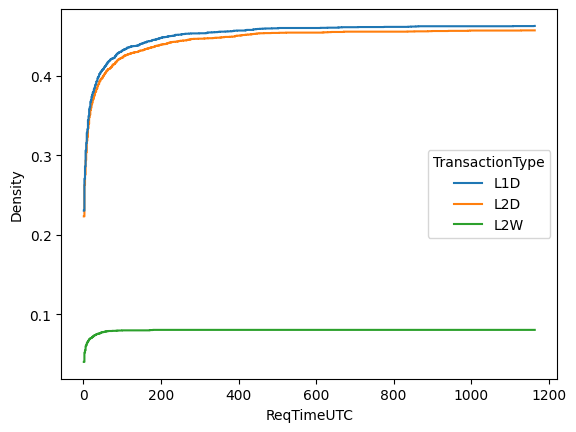

In [ ]:
# Group the dataset by 'AccountIdentifier' and 'TransactionType', then count the non-null values for each column.
# Reset the index to flatten the grouped data into a structured DataFrame.

user_type = casino.groupby(["AccountIdentifier","TransactionType"]).count().reset_index()
#sns.histplot(data = user_type, x="ReqTimeUTC", bins=50, hue = "TransactionType")



# Plot a cumulative density histogram of 'ReqTimeUTC' for different transaction types.
# - 'hue="TransactionType"' differentiates transaction types by color.
# - 'cumulative=True' makes the histogram cumulative, showing the progressive distribution over time.
# - 'stat="density"' normalizes the counts so the total area sums to 1, useful for comparing distributions.
# - 'element="step"' draws the histogram as a step line instead of bars for better visualization of density.
# - 'fill=False' removes fill to keep only the outline of the histogram for a cleaner look.

sns.histplot(data = user_type, x="ReqTimeUTC", hue = "TransactionType", cumulative = True, stat="density", element="step", fill = False )





In [ ]:
# Filter the dataset to include only transactions where:
# - 'TransactionType' is "L2D" (specific transaction category)
# - 'Status' is "APPROVED" (successful transactions)
# This ensures we analyze only valid and relevant transactions.

casino = casino[(casino.TransactionType == "L2D") & (casino.Status == "APPROVED" )].reset_index(drop=True)

# Display the shape (number of rows and columns) of the filtered dataset
# Helps verify if the filtering removed too many or too few rows.

casino.shape

(69734, 5)

In [ ]:
# Group the dataset by 'AccountIdentifier' and count the number of occurrences for each account.
# This helps analyze user activity by checking how many transactions each account has.

casino.groupby("AccountIdentifier").count()

,ReqTimeUTC,TransactionType,TransactionAmount,Status
AccountIdentifier,,,,
customer1,444,444,444,444
customer10,1130,1130,1130,1130
customer100,56,56,56,56
customer1000,2,2,2,2
customer1001,23,23,23,23
...,...,...,...,...
customer995,6,6,6,6
customer996,3,3,3,3
customer997,1,1,1,1


In [ ]:
# Group the dataset by 'AccountIdentifier' and count the number of transactions per account.
# Reset the index to convert 'AccountIdentifier' back into a column.
# Select only the first two columns (AccountIdentifier and the count of transactions)
# to focus on account-wise transaction counts.

casino.groupby("AccountIdentifier").count().reset_index().iloc[:,0:2]

,AccountIdentifier,ReqTimeUTC
0,customer1,444
1,customer10,1130
2,customer100,56
3,customer1000,2
4,customer1001,23
...,...,...
2275,customer995,6
2276,customer996,3
2277,customer997,1
2278,customer998,2


In [ ]:
# Group the dataset by 'AccountIdentifier' and count the number of transactions per account.
# Reset the index to convert 'AccountIdentifier' back into a column.
# Select only the first two columns (AccountIdentifier and transaction count).
# Sort the result by 'ReqTimeUTC' to analyze transaction activity over time.

casino.groupby("AccountIdentifier").count().reset_index().iloc[:,0:2].sort_values("ReqTimeUTC")

,AccountIdentifier,ReqTimeUTC
1139,customer2039,1
1131,customer2031,1
1130,customer2030,1
618,customer1561,1
619,customer1562,1
...,...,...
2236,customer96,900
1506,customer3,941
1462,customer26,992
223,customer120,998


In [ ]:
# Sort the result by 'ReqTimeUTC' in ascending order.
# Reverse the order (descending) using [::-1] to get the latest transactions first.
casino.groupby("AccountIdentifier").count().reset_index().iloc[:,0:2].sort_values("ReqTimeUTC")[::-1]

,AccountIdentifier,ReqTimeUTC
1,customer10,1130
223,customer120,998
1462,customer26,992
1506,customer3,941
2236,customer96,900
...,...,...
619,customer1562,1
618,customer1561,1
1130,customer2030,1
1131,customer2031,1


In [ ]:
# Identify the top 20 most frequent users based on transaction count.
# 1. Group by 'AccountIdentifier' and count the number of transactions per account.
# 2. Reset the index to convert 'AccountIdentifier' back into a column.
# 3. Select only the first two columns (AccountIdentifier and transaction count).
# 4. Sort by 'ReqTimeUTC' in descending order to get the latest transactions first.
# 5. Select the top 20 most frequent users.

top_20_ferq = casino.groupby("AccountIdentifier").count().reset_index().iloc[:,0:2].sort_values("ReqTimeUTC")[::-1][0:20]

# Identify the top 20 spenders based on total transaction amount.
# 1. Select 'AccountIdentifier' and 'TransactionAmount' for analysis.
# 2. Group by 'AccountIdentifier' and sum up the 'TransactionAmount' for each account.
# 3. Reset the index to convert 'AccountIdentifier' back into a column.
# 4. Sort by 'TransactionAmount' in descending order to get the highest spenders first.
# 5. Select the top 20 spenders.

top_20_spenders = casino[["AccountIdentifier","TransactionAmount"]].groupby("AccountIdentifier").sum().reset_index().sort_values("TransactionAmount")[::-1][0:20]


<Axes: xlabel='TransactionAmount', ylabel='AccountIdentifier'>

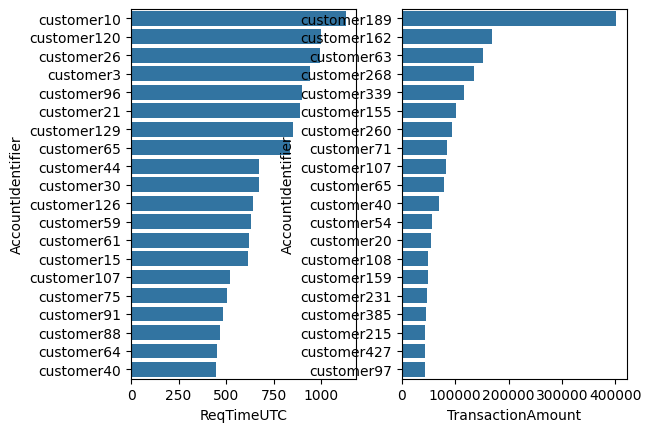

In [ ]:
# Create a figure with two subplots arranged in one row (2 columns).
fig, ax = plt.subplots(ncols = 2)

# Plot a bar chart for the top 20 most frequent users:
# - 'ReqTimeUTC' represents the number of transactions.
# - 'AccountIdentifier' represents the user.
# - The plot is assigned to the first subplot (ax[0]).

sns.barplot(top_20_ferq, x="ReqTimeUTC", y ="AccountIdentifier", ax = ax[0])

# Plot a bar chart for the top 20 highest spenders:
# - 'TransactionAmount' represents the total amount spent.
# - 'AccountIdentifier' represents the user.
# - The plot is assigned to the second subplot (ax[1]).

sns.barplot(top_20_spenders, x="TransactionAmount", y ="AccountIdentifier", ax = ax[1])

In [ ]:
# Extract the hour from 'ReqTimeUTC' and create a new column 'hour'.
# This helps analyze transaction patterns based on the time of day.

casino["hour"] = casino.ReqTimeUTC.dt.hour

# Extract the day of the week from 'ReqTimeUTC' and create a new column 'day_of_week'.
# The day_of_week is represented as an integer (Monday = 0, Sunday = 6).

casino["day_of_week"] = casino.ReqTimeUTC.dt.day_of_week

# Define a mapping dictionary to rename days with numbered labels for better sorting.

day_of_week_dict = {1:"1_Monday",2:"2_Tuesday",3:"3_Wednesday",4:"4_Thrusday",5:"5_Friday",6:"1_Saturday",7:"7_Sunday"}

# Map the numeric day_of_week values to the formatted names for better readability.

casino["day_of_week"] = casino["day_of_week"].map(day_of_week_dict) 

# Display the updated DataFrame with new 'hour' and 'day_of_week' columns.

casino

,ReqTimeUTC,TransactionType,TransactionAmount,Status,AccountIdentifier,hour,day_of_week
0,2019-07-05 05:02:28+00:00,L2D,10.0,APPROVED,customer1734,5,4_Thrusday
1,2019-07-05 05:26:00+00:00,L2D,10.0,APPROVED,customer1734,5,4_Thrusday
2,2019-07-05 04:54:37+00:00,L2D,10.0,APPROVED,customer1734,4,4_Thrusday
3,2020-02-02 06:50:37+00:00,L2D,50.0,APPROVED,customer935,6,1_Saturday
4,2019-12-13 12:29:32+00:00,L2D,100.0,APPROVED,customer935,12,4_Thrusday
...,...,...,...,...,...,...,...
69729,2020-02-12 10:54:47+00:00,L2D,10.0,APPROVED,customer1576,10,2_Tuesday
69730,2019-08-24 21:32:43+00:00,L2D,10.0,APPROVED,customer1874,21,5_Friday
69731,2019-11-01 06:51:07+00:00,L2D,30.0,APPROVED,customer1994,6,4_Thrusday
69732,2019-05-23 20:02:49+00:00,L2D,10.0,APPROVED,customer2215,20,3_Wednesday


In [ ]:
# Select and display specific columns from the dataset:
# - 'hour': Represents the hour of the transaction (extracted from 'ReqTimeUTC').
# - 'day_of_week': Represents the day of the transaction (mapped to a readable format).
# - 'TransactionType': Indicates the type of transaction performed.

casino[['hour', 'day_of_week', 'TransactionType']]


,hour,day_of_week,TransactionType
0,5,4_Thrusday,L2D
1,5,4_Thrusday,L2D
2,4,4_Thrusday,L2D
3,6,1_Saturday,L2D
4,12,4_Thrusday,L2D
...,...,...,...
69729,10,2_Tuesday,L2D
69730,21,5_Friday,L2D
69731,6,4_Thrusday,L2D
69732,20,3_Wednesday,L2D


<Axes: xlabel='hour', ylabel='day_of_week'>

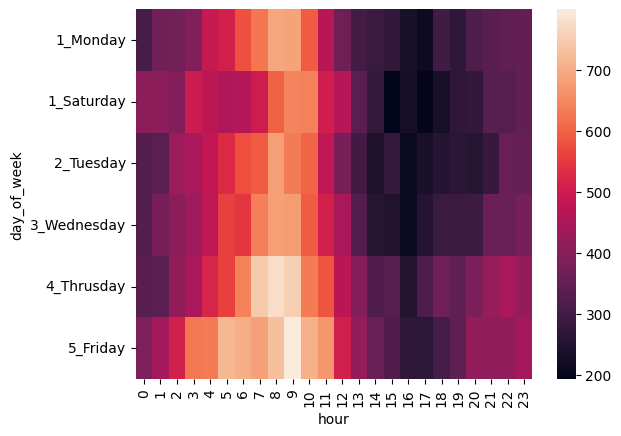

In [ ]:
# Group the dataset by 'hour' and 'day_of_week', counting the number of transactions.
# - This helps analyze transaction frequency based on time and day.

h_d_g = casino[['hour', 'day_of_week', 'TransactionType']].groupby(['hour', 'day_of_week']).count().reset_index()

# Create a pivot table where:
# - Rows ('index') represent 'day_of_week'.
# - Columns represent transaction 'hour'.
# - Values are the count of 'TransactionType' (number of transactions).

casino_hm = pd.pivot_table(h_d_g, values='TransactionType', index='day_of_week', columns='hour')

# Generate a heatmap to visualize transaction frequency by day and hour.
# - Darker colors indicate fewer transactions, while brighter colors indicate more.

sns.heatmap(casino_hm)

In [ ]:
# Convert 'ReqTimeUTC' from a full timestamp to a period format representing only the date (YYYY-MM-DD).
# - This removes the time component, making it easier to analyze daily trends.
# - The data type changes from 'datetime64[ns, UTC]' to 'period[D]'.

casino['ReqTimeUTC'] = casino.ReqTimeUTC.dt.to_period('D')

# Display the first few rows of the updated dataset.

casino.head()

C:\Users\tulik\AppData\Local\Temp\ipykernel_28440\3740699593.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  casino['ReqTimeUTC'] = casino.ReqTimeUTC.dt.to_period('D')


,ReqTimeUTC,TransactionType,TransactionAmount,Status,AccountIdentifier,hour,day_of_week
0,2019-07-05,L2D,10.0,APPROVED,customer1734,5,4_Thrusday
1,2019-07-05,L2D,10.0,APPROVED,customer1734,5,4_Thrusday
2,2019-07-05,L2D,10.0,APPROVED,customer1734,4,4_Thrusday
3,2020-02-02,L2D,50.0,APPROVED,customer935,6,1_Saturday
4,2019-12-13,L2D,100.0,APPROVED,customer935,12,4_Thrusday


In [ ]:

# Aggregate daily transaction activity per account:
# - Group by 'AccountIdentifier' and 'ReqTimeUTC' (now in daily format).
# - Aggregate:
#   - 'TransactionAmount': Sum the total transaction amount per day.
#   - 'TransactionType': Count the number of transactions per day (indicating activity level).
# - Reset the index to convert the grouped data back into a DataFrame.
daily_activity = casino.groupby(['AccountIdentifier', 'ReqTimeUTC']).agg({
    'TransactionAmount': 'sum',  # Total amount spent per account per day.
    'TransactionType': 'count'   # Number of transactions per account per day.
}).reset_index()



TypeError: Invalid object type at position 0

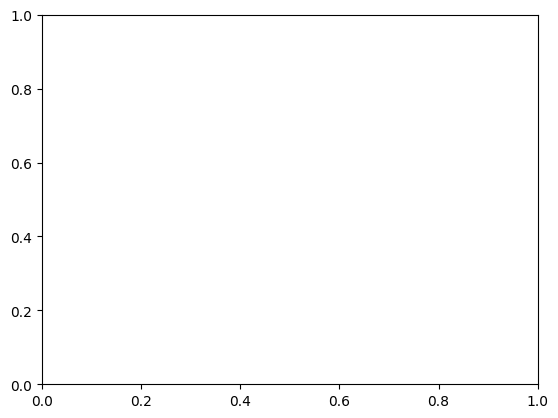

In [ ]:
# Filter the dataset for a specific customer ("customer1") to analyze their transaction trends.
# - Select only the first 20 records for visualization.

c1 = daily_activity[daily_activity.AccountIdentifier == "customer1"][0:20]

# Plot a line chart showing 'TransactionAmount' over time for "customer1".
# - X-axis: 'ReqTimeUTC' (date of transaction).
# - Y-axis: 'TransactionAmount' (total amount spent per day).

sns.lineplot(c1, x="ReqTimeUTC", y="TransactionAmount" )

In [ ]:
# Initialize an empty DataFrame to store the results for all customers.
full_customer_df = pd.DataFrame()

# Iterate over each unique customer in the dataset.
for customer_id in daily_activity.AccountIdentifier.unique():

    # Filter data for the current customer.
    customer_df = daily_activity[daily_activity.AccountIdentifier == customer_id]
    
    # Generate a complete date range from the earliest to the latest transaction for the customer.
    full_range = pd.date_range(customer_df.ReqTimeUTC.min().to_timestamp(), customer_df.ReqTimeUTC.max().to_timestamp(), freq="D" )
    
    # Set 'ReqTimeUTC' as the index for easier reindexing.
    customer_df = customer_df.set_index(keys = "ReqTimeUTC" )
    
    # Reindex to ensure all dates in 'full_range' exist, filling missing values with 0.
    customer_df = customer_df.reindex(list(full_range), fill_value=0)
 

   #Assign the 'AccountIdentifier' back to the newly created DataFrame.
    customer_df.AccountIdentifier = [customer_id]*len(customer_df)

     # Reset the index to turn the date index back into a column.
    customer_df = customer_df.reset_index()

    # Append the processed customer data to the final DataFrame.
    full_customer_df = pd.concat([full_customer_df, customer_df])

# Display the final DataFrame containing all customers with complete date ranges.
full_customer_df



,ReqTimeUTC,AccountIdentifier,TransactionAmount,TransactionType
0,2019-03-01,customer1,0.0,0
1,2019-03-02,customer1,0.0,0
2,2019-03-03,customer1,0.0,0
3,2019-03-04,customer1,0.0,0
4,2019-03-05,customer1,0.0,0
...,...,...,...,...
182,2019-09-12,customer996,0.0,0
183,2019-09-13,customer996,0.0,0
0,2019-09-22,customer997,0.0,0
0,2019-11-09,customer998,0.0,0


In [ ]:
# Extract the month from 'ReqTimeUTC' and store it in a new column.
# - Converts the daily period data to a monthly period for easier aggregation.

full_customer_df["Month"] = full_customer_df.ReqTimeUTC.dt.to_period("M")

# Group data by 'Month' and 'AccountIdentifier' to count occurrences.
# - This helps track the number of active customers per month.

customer_month = full_customer_df.groupby(["Month", "AccountIdentifier"]).count().reset_index().iloc[:,:2]

# Identify the first (start) and last (end) month of activity for each customer.
# - 'min()' gives the earliest month of activity.
# - 'max()' gives the latest month of activity.

start_ = customer_month.groupby("AccountIdentifier").min().reset_index()
end_ = customer_month.groupby("AccountIdentifier").max().reset_index()

# Merge the start and end months into a single DataFrame for each customer.
start_end_df = pd.merge(start_, end_, on = "AccountIdentifier")

# Count how many customers started in one month and ended in another.
# - Groups by start ('Month_x') and end ('Month_y') to find patterns in customer activity duration.

source_target_value = start_end_df.groupby(["Month_x", "Month_y"]).count().reset_index()



,Month_x,Month_y,AccountIdentifier
0,2019-03,2019-03,276
1,2019-03,2019-04,58
2,2019-03,2019-05,49
3,2019-03,2019-06,33
4,2019-03,2019-07,27
...,...,...,...
73,2019-12,2020-01,17
74,2019-12,2020-02,30
75,2020-01,2020-01,134
76,2020-01,2020-02,38


In [ ]:
# Initialize a LabelEncoder instance
le = LabelEncoder()

# Fit and transform the unique values in 'Month_x' to numerical labels.
# - This assigns a unique numeric code to each unique month.
# - Useful for converting categorical time periods into numeric form for analysis.

le.fit_transform(source_target_value.Month_x.unique())

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [ ]:
from sklearn.preprocessing import LabelEncoder
import plotly.graph_objects as go

# Convert Period to string before encoding
source_target_value['Month_x'] = source_target_value['Month_x'].astype(str)
source_target_value['Month_y'] = source_target_value['Month_y'].astype(str)

# Fit LabelEncoder
le = LabelEncoder()
all_months = list(set(source_target_value.Month_x.tolist() + source_target_value.Month_y.tolist()))
le.fit(all_months)  

# Encode source and target months
source = le.transform(source_target_value.Month_x.tolist())
target = le.transform(source_target_value.Month_y.tolist())

# Create Sankey Diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=300, # Reduced for better spacing
        thickness=10, # Increased for better visibility
        line=dict(width=2, color="black"),
        label=all_months,  # Display month labels
        color="blue"
    ),
    link=dict(
        source=source,
        target=target,
        value=source_target_value.AccountIdentifier.tolist()  # Assuming it's numerical
    )
)])

fig.update_layout(title_text="Basic Sankey Diagram", font_size=15)
fig.show()


In [ ]:
# Filter records where 'Month_x' is equal to 'Month_y' (i.e., no transition between months)
# These represent cases where the account remains in the same month category.

fast_quiter = source_target_value[source_target_value.Month_x == source_target_value.Month_y]

# Filter out records where 'Month_x' is NOT equal to 'Month_y' 
# This keeps only the records where there is a transition from one month to another.

source_target_value = source_target_value[source_target_value.Month_x != source_target_value.Month_y]

In [ ]:
# Group by the 'Month' column and count the number of customers in each month.
# The `.count()` function counts the number of non-null values in each column.
# `.reset_index()` ensures the grouped data is converted back into a DataFrame format.

total_num_customer = customer_month.groupby("Month").count().reset_index()

# Display the result

total_num_customer

,Month,AccountIdentifier
0,2019-03,743
1,2019-04,672
2,2019-05,699
3,2019-06,669
4,2019-07,660
5,2019-08,624
6,2019-09,594
7,2019-10,572
8,2019-11,555
9,2019-12,563


In [ ]:
# Select only the 'Month_x' and 'AccountIdentifier' columns from the fast_quiter DataFrame.
# This creates a new DataFrame (fq_df) containing only relevant information.

fq_df = fast_quiter[["Month_x", "AccountIdentifier"]]

# Display the resulting DataFrame
fq_df

,Month_x,AccountIdentifier
0,2019-03,276
12,2019-04,92
23,2019-05,105
33,2019-06,82
42,2019-07,94
50,2019-08,80
57,2019-09,70
63,2019-10,62
68,2019-11,65
72,2019-12,87


In [ ]:
#pd.merge(total_num_customer, fq_df, right_on = "Month_x", left_on = "Month")

# Convert Month_x (fq_df) to string
fq_df["Month_x"] = fq_df["Month_x"].astype(str)

# Convert Month (total_num_customer) to string
total_num_customer["Month"] = total_num_customer["Month"].astype(str)

# Merge after fixing data types
merged_df = pd.merge(total_num_customer, fq_df, right_on="Month_x", left_on="Month", how="outer")[["Month", "AccountIdentifier_x", "AccountIdentifier_y"]]

# Show merged DataFrame
#print(merged_df.head())

merged_df.rename(columns = {"Month":"Month", "AccountIdentifier_x":"Total", "AccountIdentifier_y":"Quit"}, inplace=True)

merged_df






,Month,Total,Quit
0,2019-03,743,276
1,2019-04,672,92
2,2019-05,699,105
3,2019-06,669,82
4,2019-07,660,94
5,2019-08,624,80
6,2019-09,594,70
7,2019-10,572,62
8,2019-11,555,65
9,2019-12,563,87


C:\Users\tulik\AppData\Roaming\Python\Python312\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

C:\Users\tulik\AppData\Roaming\Python\Python312\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



<Axes: xlabel='Month', ylabel='value'>

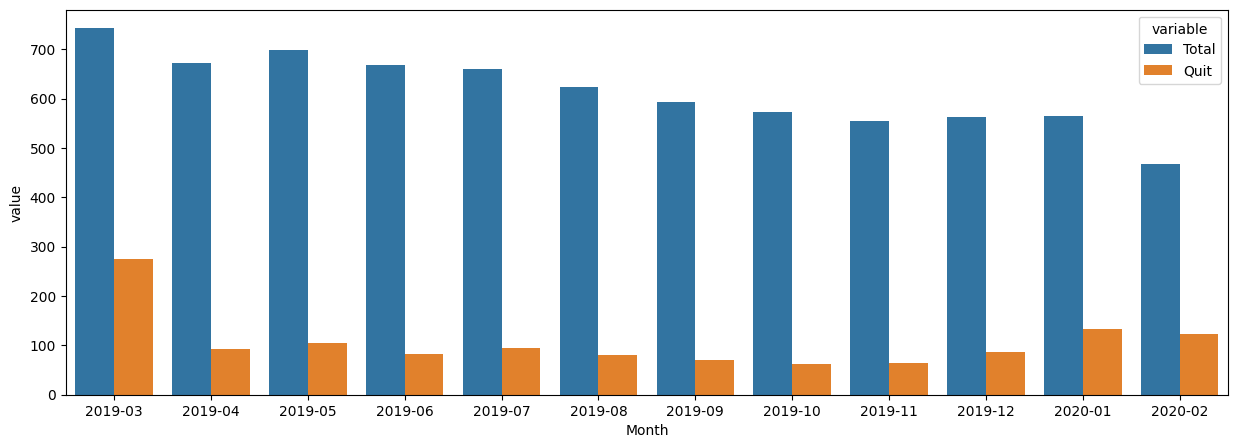

In [ ]:
# Create a figure and axis with a specified figure size

fig, ax = plt.subplots(figsize =(15,5))

# Melt the DataFrame to transform it from wide to long format for easier plotting

sns.barplot(merged_df.melt(id_vars=["Month"]), x = "Month", y="value", hue = "variable")